# Fifth homework

### 04.05.2020
### Kazimierz Wojciechowski

## 1. For the selected data set, train at least one tree-based ensemble model (random forest, gbm, catboost or any other boosting)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
import lime
import lime.lime_tabular

In [2]:
file = "mushrooms.csv"
df = pd.read_csv(file)

In [3]:
labels = [(1.0 if cls == 'p' else 0.0) for cls in df['class']] 
df_wo_class = df.drop(['class'], axis=1)

In [4]:
def variable_encode(value):
    return ord(value)

def variable_decode(value):
    return chr(value)

In [12]:
df_wo_class_numeric = df_wo_class.copy()
df_wo_class_numeric = df_wo_class.transform(func=[variable_encode])

In [14]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = \
    train_test_split(df_wo_class_numeric, labels, test_size = 0.3, random_state = 314159265)

In [49]:
from sklearn.ensemble import RandomForestClassifier

# The following parameters were varied throughout generating the report
rf_model = RandomForestClassifier(
    n_estimators=4,
    max_depth=3,
    random_state=314159265
    )
rf_model.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=314159265,
                       verbose=0, warm_start=False)

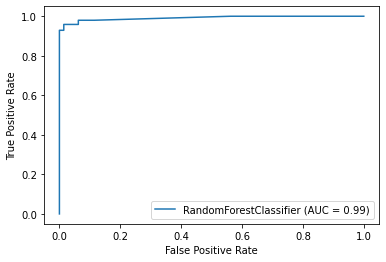

In [51]:
roc_value = plot_roc_curve(rf_model, test_features, test_labels)
plt.show()

## 2. Calculate permutational variable importance for the selected model

In [52]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, test_features, test_labels, n_repeats=100, random_state=1618)

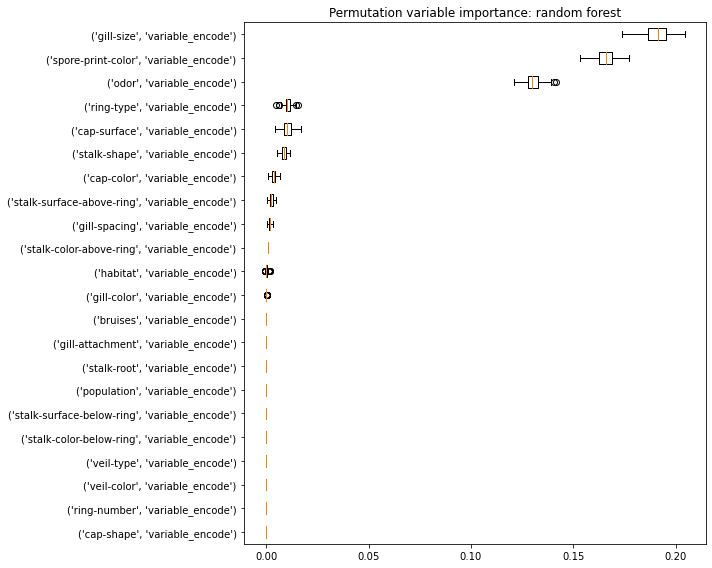

In [59]:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=test_features.columns[sorted_idx])
ax.set_title('Permutation variable importance: random forest')
fig.tight_layout()
plt.show()

## 3. Train three or more candidate models (different variables, different transformations, different model structures) and compare ranking of important features between these models. Are they similar or different?